In [ ]:
import pandas as pd

### 19년 10월 속도데이터 집계

In [ ]:
traffic_data = pd.read_excel('./2019년 10월 서울시 차량통행속도.xlsx')

In [ ]:
traffic_data['기능유형구분'].unique()

array(['보조간선도로', '기타도로', '주간선도로', '도시고속도로'], dtype=object)

In [ ]:
traffic_data.head()

,일자,요일,도로명,링크아이디,시점명,종점명,방향,거리,차선수,기능유형구분,...,권역구분,01시,02시,03시,04시,05시,06시,07시,08시,09시
0,20191001,화,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1.0,보조간선도로,...,강북구,44.37,27.74,51.52,59.43,71.98,42.95,39.85,39.31,29.39
1,20191001,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,2.0,보조간선도로,...,강북구,26.73,17.75,16.87,23.07,29.51,18.89,20.79,20.76,14.00
2,20191001,화,4.19로,1080012700,국립4.19묘지입구,국립4.19묘지,하행,354,2.0,보조간선도로,...,강북구,24.35,25.73,28.43,29.26,31.41,26.89,23.96,23.19,23.01
3,20191001,화,4.19로,1080012100,국립4.19묘지,아카데미하우스,하행,1190,1.0,보조간선도로,...,강북구,48.56,40.97,44.93,66.25,87.24,51.61,46.12,37.36,48.37
4,20191001,화,가락로,1230024700,방이초교,방이동고분군,상행,844,1.0,기타도로,...,송파구,21.17,20.23,19.30,27.08,24.88,22.75,20.99,18.37,14.59


In [ ]:
traffic_data.columns

Index(['일자', '요일', '도로명', '링크아이디', '시점명', '종점명', '방향', '거리', '차선수', '기능유형구분',
       '도심/외곽구분', '권역구분', '01시', '02시', '03시', '04시', '05시', '06시', '07시',
       '08시', '09시'],
      dtype='object')

In [ ]:
mean = list()
var = list()
std = list()
for i in range(0,len(traffic_data)):
    mean_data = traffic_data.loc[i,'01시':'09시'].mean()
    var_data = traffic_data.loc[i,'01시':'09시'].var()
    std_data = traffic_data.loc[i,'01시':'09시'].std()
    mean.append(mean_data)
    var.append(var_data)
    std.append(std_data)

In [ ]:
traffic_data['MEAN'] = mean
traffic_data['VAR'] = var
traffic_data['STD'] = std

In [ ]:
weekDay = ['월','화','수','목','금']
weekEnd = ['토','일']

aggregate_weekDay_by_linkId = traffic_data[traffic_data['요일'].isin(weekDay) & (~traffic_data['기능유형구분'].isin(['도시고속도로']))]
aggregate_weekEnd_by_linkId = traffic_data[traffic_data['요일'].isin(weekEnd) & (~traffic_data['기능유형구분'].isin(['도시고속도로']))]

weekDay_agg_data = aggregate_weekDay_by_linkId.groupby(['링크아이디','시점명','종점명'])[['MEAN','VAR','STD']].mean()
weekEnd_agg_data = aggregate_weekEnd_by_linkId.groupby(['링크아이디','시점명','종점명'])[['MEAN','VAR','STD']].mean()

display(weekDay_agg_data.sort_values(by=['STD','VAR','MEAN']))
display(weekEnd_agg_data.sort_values(by=['STD','VAR','MEAN']))

,,,MEAN,VAR,STD
링크아이디,시점명,종점명,,,
1080005100,수유사거리,미아역,26.701159,0.580247,0.692503
1210027800,동작대교북단,동작대교남단,65.109662,1.217287,0.826766
1240006000,둔촌사거리,둔촌동역,34.462609,1.198049,1.037240
1000013000,동묘앞역,창신역,27.678696,1.167475,1.053819
1220029500,강남경찰서,정신여중고앞,40.019034,1.274346,1.099219
...,...,...,...,...,...
1150004700,개화교,방화2동상사마을입구,36.607440,312.906651,17.560437
1170017000,독산한신아파트,금천육교,38.773285,329.764364,17.577804
1170014600,금천육교,시흥대교교차로,38.911063,333.543380,17.672015


,,,MEAN,VAR,STD
링크아이디,시점명,종점명,,,
1150007100,벌말로김포시계,행주대교남단(개화IC),61.344028,0.287331,0.524829
1210017200,내방역,방배고개,23.942222,0.546759,0.696167
1170001700,시흥벽산아파트,시계(호암로),45.405278,0.576467,0.725292
1220029000,삼릉공원,경복아파트,24.505972,0.649449,0.757704
1210027800,동작대교북단,동작대교남단,65.194861,0.891016,0.786198
...,...,...,...,...,...
1120036200,남가좌동새마을금고,DMC파크뷰APT,23.850000,226.665050,14.411370
1150162701,강서도로사업소,마곡나루역,31.417396,217.529364,14.608011
1040005700,뚝섬한강시민공원,신자초교입구,32.042778,216.908829,14.723657


In [ ]:
weekDay_agg_data.reset_index(level=['링크아이디','시점명','종점명'])

weekDay_agg_data.to_excel('19년 10월 집계데이터(주중).xlsx')

---

### Tmap Data 정제

In [ ]:
tmap_data = pd.read_csv('./TMAP_DATA.csv')
tmap_data.head()
# 링크아이디, 통행량
# 링크아이디별로 통행량 합산

,201910310000,1000000301,151,27.39,19.84,5
0,201910310000,1000000302,105,27.39,13.80,5
1,201910310000,1000000303,67,27.39,8.80,5
2,201910310000,1000000401,151,17.52,31.02,9
3,201910310000,1000000402,105,17.52,21.57,9
4,201910310000,1000000403,68,17.52,13.97,9


In [ ]:
tmap_data.columns = ['날짜','링크아이디','col1','col2','col3','통행량']
tmap_data_extract = tmap_data[['링크아이디','통행량']]
tmap_data_extract.head()

,링크아이디,통행량
0,1000000302,5
1,1000000303,5
2,1000000401,9
3,1000000402,9
4,1000000403,9


In [ ]:
result = tmap_data_extract.groupby('링크아이디')['통행량'].sum().to_frame()

len(result)

13742

In [ ]:
type(result)

pandas.core.frame.DataFrame

In [ ]:
result.to_csv('Tmap 링크아이디별 통행량 합계.csv')

In [ ]:
a = weekDay_agg_data.reset_index()

In [ ]:
a.merge(result,left_on='링크아이디',right_on='링크아이디')

,링크아이디,시점명,종점명,MEAN,VAR,STD,통행량
0,1000001700,종로5가,종로4가,25.627778,8.750090,2.836569,2530
1,1000002100,동묘앞역,흥인지문,21.158454,25.861973,4.952092,2950
2,1000003400,광교,모전교,20.999662,9.847203,3.085862,306
3,1000003700,청계광장,모전교,17.861594,9.209802,2.975517,547
4,1000003900,종로2가,청계2가,27.346473,6.398431,2.485858,1819
...,...,...,...,...,...,...,...
1274,1240027400,고덕시영아파트,고덕근린공원,32.814203,7.709510,2.728350,1753
1275,1240027700,샘터근린공원,광문고교,25.753188,14.214615,3.687248,487
1276,1240027800,광문고교,샘터근린공원,25.306232,21.030897,4.475062,492
1277,1240028100,샘터근린공원,고덕근린공원,32.311208,11.169875,3.213208,2286


In [ ]:
a.to_excel('고속도로제외 집계파일.xlsx')

---

### 상관계수

In [ ]:
traffic_data_be = pd.read_excel('./서울시 191031 교통자료.xls')

traffic_data = traffic_data_be.rename(columns={'표준링크아이디':'LinkId','통행량':'traffic'})
traffic_data.head()

,LinkId,LANES,STD,traffic
0,1190000200,5,18.019686,39363
1,1210005301,5,22.104007,33773
2,1210002900,5,27.881562,33524
3,1210003000,5,15.316664,33206
4,1210004901,4,12.816235,32641


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
X = traffic_data.iloc[:,:-1]

y_data = traffic_data.iloc[:,-1]
# y = scaler.fit_transform(np.reshape(y_data.to_numpy(),(-1,1)))
y = y_data
reg = LinearRegression().fit(X, y)
display(reg.score(X, y))
display(reg.coef_)


0.4601516152061573

array([-4.37737623e-07,  1.63476826e+03,  6.11091982e+02])

In [ ]:
import seaborn as sns

In [ ]:
# scaler 사용 시 실행
# traffic_data['traffic'] = pd.Series(y.flatten())

AttributeError: 'Series' object has no attribute 'flatten'

In [ ]:
traffic_data.head()

,LinkId,LANES,STD,traffic
0,1190000200,5,18.019686,39363
1,1210005301,5,22.104007,33773
2,1210002900,5,27.881562,33524
3,1210003000,5,15.316664,33206
4,1210004901,4,12.816235,32641


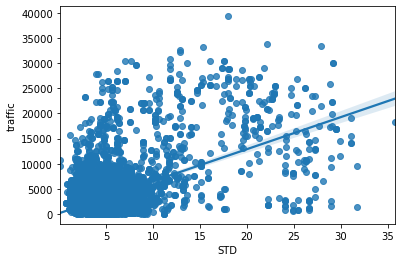

In [ ]:
ax = sns.regplot(x='STD',y='traffic',data=traffic_data)

<AxesSubplot:>

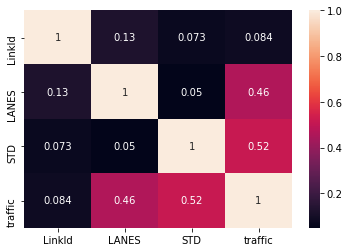

In [ ]:
corr_df = traffic_data.corr()
sns.heatmap(corr_df,annot=True)

In [ ]:
corr_df

,LinkId,LANES,STD,traffic
LinkId,1.000000,0.126026,0.073188,0.084139
LANES,0.126026,1.000000,0.049551,0.464665
STD,0.073188,0.049551,1.000000,0.516563
traffic,0.084139,0.464665,0.516563,1.000000


In [ ]:
from scipy import stats

In [ ]:
result = stats.ttest_ind(X['STD'], y)

print("t검정 통계량: %.3f, pvalue=%.5f"%(result))

t검정 통계량: -74.672, pvalue=0.00000


---

In [ ]:
import geopandas as gpd
import missingno as msno
import pyproj

In [ ]:
pyproj.datadir.get_data_dir()

'C:\\Users\\user\\anaconda3\\lib\\site-packages\\pyproj\\proj_dir\\share\\proj'

In [ ]:
bus_stop = gpd.read_file('./서울시_버스정류소_좌표데이터/서울시_버스정류소_좌표데이터.shp')

CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)